<a href="https://colab.research.google.com/github/cmnemoi/ProjetDataScienceLPSID/blob/rapport/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Science - Nettoyage des données
### Enzo Rizbeth et Charles-Meldhine MADI MNEMOI


### Importation des packages et des données

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
data = pd.read_csv("https://raw.githubusercontent.com/cmnemoi/ProjetDataScienceLPSID/data_cleaning/data/data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [21]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1.0,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5
1,1.0,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1.0,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0
2,1.0,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2.0,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0
3,1.0,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2.0,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5
4,1.0,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1.0,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5


On remarque notamment à l'aide du dictionnaire des variables que la variable à prédire `Total_amount` est la somme des variables suivantes : `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge` et `congestion_surcharge`. 
Les introduire dans notre modèle de prédiction n'est pas très pertinent, on les retire donc.

In [22]:
data = data.drop(["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge"], axis=1)

In [23]:
data.shape

(348371, 11)

### Retrait des valeurs manquantes

In [24]:
data.isna().sum()

VendorID                 58891
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          58891
trip_distance                0
RatecodeID               58891
store_and_fwd_flag       58891
PULocationID                 0
DOLocationID                 0
payment_type             58891
total_amount                 0
dtype: int64

On observe des valeurs manquantes dans `VendorID`, `passenger_count`, `RatecodeID`, `store_and_fwd_flag` et `payment_type`. Ces individus ne représentant que 15% du dataset, on décide de les supprimer car il nous restera toujours assez de données pour travailler par la suite.

In [25]:
data = data.dropna()

In [26]:
data.shape

(289480, 11)

### Identification des valeurs aberrantes

In [27]:
for column in data.columns:
    print(f"Valeurs uniques dans {column} : {np.sort(data[column].unique())}")

Valeurs uniques dans VendorID : [1. 2.]
Valeurs uniques dans tpep_pickup_datetime : ['2008-12-31 23:05:47' '2009-01-01 00:57:36' '2009-01-01 02:19:49' ...
 '2020-11-01 15:15:05' '2020-11-01 15:26:33' '2020-11-01 15:41:04']
Valeurs uniques dans tpep_dropoff_datetime : ['2008-12-31 23:33:33' '2009-01-01 01:05:48' '2009-01-01 02:23:35' ...
 '2020-11-01 15:23:18' '2020-11-01 15:39:04' '2020-11-01 15:57:02']
Valeurs uniques dans passenger_count : [0. 1. 2. 3. 4. 5. 6. 8. 9.]
Valeurs uniques dans trip_distance : [0.000000e+00 1.000000e-02 2.000000e-02 ... 2.380000e+02 3.051000e+02
 1.097355e+04]
Valeurs uniques dans RatecodeID : [ 1.  2.  3.  4.  5.  6. 99.]
Valeurs uniques dans store_and_fwd_flag : ['N' 'Y']
Valeurs uniques dans PULocationID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  28  29  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64

VendorID : ok
 
tpep_pickup_dateime : ok
 
tpep_dropoff_datetime : ok
 
passenger_count : les nombres de passagers à 8 et 9 semblent aberrantes, on les retire
 
trip_distance : à étudier en détail, valeurs à 0 à retirer
 
RateCodeID : vérifier combien il y a de 99 (valeurs absentes du dictionnaire). si négligeable, à supprimer
 
store_and_fwd_flag : RAS
 
PULocationID : RAS
 
DOLocationID : vérifier en déail

total_amount : passer les valeurs négatives en positif

In [64]:
data[~data["tpep_pickup_datetime"].str.contains("2020-05")].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
598,2.0,2020-04-30 17:55:31,2020-04-30 18:00:22,1.0,1.16,1.0,N,238,236,2.0,9.30
599,2.0,2020-04-30 18:18:23,2020-05-01 17:30:12,1.0,1.07,1.0,N,249,249,2.0,11.80
1065,2.0,2020-04-30 17:37:42,2020-04-30 17:48:31,1.0,2.77,1.0,N,230,263,1.0,16.56
1066,2.0,2020-04-30 18:12:23,2020-05-01 17:29:16,1.0,5.32,1.0,N,142,231,2.0,19.80
35086,2.0,2009-01-01 02:19:49,2009-01-01 02:23:35,3.0,0.98,1.0,N,74,75,2.0,5.80


In [69]:
print("Trajets hors mai 2020 : {}".format(data[~data["tpep_pickup_datetime"].str.contains("2020-05")].shape[0]))

Trajets hors mai 2020 : 23


In [72]:
print("Trajets hors mai 2020 : {}".format(data[~data["tpep_dropoff_datetime"].str.contains("2020-05")].shape[0]))

Trajets hors mai 2020 : 69


In [92]:
data[data["passenger_count"] < 1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
4,1.0,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1.0,11.00
5,1.0,2020-05-01 00:38:37,2020-05-01 01:03:08,0.0,12.0,1.0,N,140,28,1.0,39.30
74,1.0,2020-05-01 00:02:48,2020-05-01 00:07:05,0.0,1.2,1.0,N,137,141,2.0,9.30
75,1.0,2020-05-01 00:20:58,2020-05-01 00:24:21,0.0,0.6,1.0,N,141,237,1.0,10.35
217,2.0,2020-05-01 03:13:06,2020-05-01 03:13:12,0.0,0.0,5.0,N,41,41,1.0,28.99
...,...,...,...,...,...,...,...,...,...,...,...
289427,1.0,2020-05-31 23:00:43,2020-05-31 23:17:42,0.0,6.3,1.0,N,162,244,2.0,23.80
289428,1.0,2020-05-31 23:18:01,2020-05-31 23:25:24,0.0,1.4,1.0,N,170,186,1.0,13.56
289429,1.0,2020-05-31 23:28:44,2020-05-31 23:42:22,0.0,4.4,1.0,N,48,41,1.0,21.95
289454,1.0,2020-05-31 23:47:54,2020-05-31 23:55:45,0.0,1.1,1.0,N,74,41,2.0,7.80


In [28]:
data[data["passenger_count"] >= 8]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
166705,2.0,2020-05-20 06:42:42,2020-05-20 06:42:48,9.0,0.0,5.0,N,264,264,1.0,11.76
288378,2.0,2020-05-31 20:53:17,2020-05-31 20:53:19,8.0,0.0,5.0,N,116,116,1.0,11.00


In [29]:
data[data["trip_distance"] <= 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,1.0,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1.0,18.4
45,1.0,2020-05-01 00:32:39,2020-05-01 00:48:16,1.0,0.0,1.0,N,137,69,1.0,28.0
72,1.0,2020-05-01 00:23:55,2020-05-01 00:24:17,1.0,0.0,2.0,N,79,79,4.0,55.3
73,1.0,2020-05-01 00:24:44,2020-05-01 00:35:15,1.0,0.0,1.0,N,107,140,4.0,10.8
131,1.0,2020-05-01 01:18:42,2020-05-01 01:29:18,1.0,0.0,1.0,N,146,82,1.0,13.2
...,...,...,...,...,...,...,...,...,...,...,...
289399,1.0,2020-05-31 23:09:35,2020-05-31 23:27:07,1.0,0.0,1.0,N,61,222,1.0,18.0
289425,1.0,2020-05-31 23:12:10,2020-05-31 23:26:18,1.0,0.0,1.0,N,107,65,1.0,16.1
289426,1.0,2020-05-31 23:57:40,2020-06-01 00:25:49,1.0,0.0,1.0,N,232,177,1.0,21.0
289473,2.0,2020-05-31 23:07:50,2020-05-31 23:08:50,1.0,0.0,5.0,N,237,237,2.0,12.8


In [103]:
data["trip_distance"].describe()

count    289480.000000
mean          2.731006
std          20.695962
min           0.000000
25%           0.940000
50%           1.700000
75%           3.100000
max       10973.550000
Name: trip_distance, dtype: float64

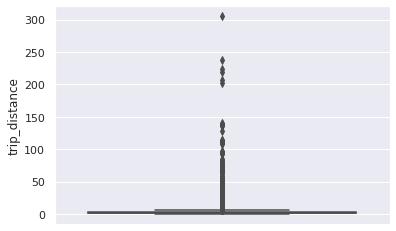

In [108]:
sns.boxplot(y=data[data["trip_distance"] < 10000]["trip_distance"])

In [106]:
data["trip_distance"].quantile(q=0.95)

8.6

In [77]:
data[data["RatecodeID"] == 99].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
1103,2.0,2020-05-01 07:59:33,2020-05-01 08:10:08,1.0,0.0,99.0,N,193,146,1.0,20.23
5312,2.0,2020-05-01 14:28:38,2020-05-01 14:32:06,1.0,0.0,99.0,N,132,132,2.0,3.80
10534,2.0,2020-05-02 07:33:40,2020-05-02 07:39:07,1.0,0.0,99.0,N,137,198,2.0,23.14
19436,1.0,2020-05-03 14:20:34,2020-05-03 14:20:34,0.0,0.0,99.0,Y,163,264,1.0,12.35
30597,1.0,2020-05-04 20:08:54,2020-05-04 20:09:47,1.0,0.0,99.0,N,142,142,3.0,429562.25


In [79]:
data[data["RatecodeID"] == 99].size

275

In [30]:
data[data["total_amount"] < 0]["total_amount"]

33        -8.30
41       -11.80
159       -6.80
161       -4.30
164      -12.80
          ...  
289021   -52.05
289082    -8.80
289190   -12.80
289308   -16.30
289400   -18.80
Name: total_amount, Length: 1517, dtype: float64

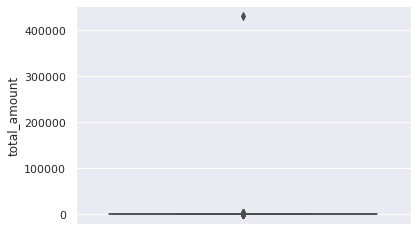

In [81]:
sns.boxplot(y=data["total_amount"])

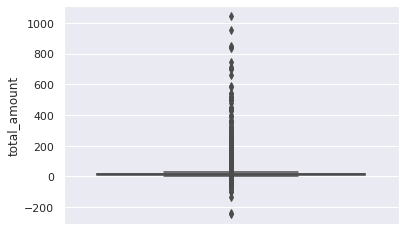

In [84]:
sns.boxplot(y=data[data["total_amount"] < 400000]["total_amount"])

In [85]:
data["total_amount"].describe()

count    289480.000000
mean         17.478461
std         798.479815
min        -244.300000
25%           9.800000
50%          12.800000
75%          17.880000
max      429562.250000
Name: total_amount, dtype: float64

In [102]:
data[data["total_amount"] >= data["total_amount"].quantile(q=0.9999)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
8826,1.0,2020-05-01 19:03:22,2020-05-01 19:03:31,1.0,223.70,1.0,N,91,91,4.0,579.80
30597,1.0,2020-05-04 20:08:54,2020-05-04 20:09:47,1.0,0.00,99.0,N,142,142,3.0,429562.25
34672,1.0,2020-05-05 12:17:43,2020-05-05 17:38:30,0.0,138.80,1.0,N,138,39,1.0,536.75
39290,1.0,2020-05-05 20:08:44,2020-05-05 20:09:25,0.0,0.30,5.0,N,265,265,3.0,950.30
39291,1.0,2020-05-05 20:11:47,2020-05-05 20:12:39,1.0,0.30,5.0,N,265,265,3.0,700.30
39293,1.0,2020-05-05 20:15:44,2020-05-05 20:17:15,0.0,0.30,5.0,N,265,265,1.0,840.35
39294,1.0,2020-05-05 20:18:49,2020-05-05 20:19:28,0.0,0.30,5.0,N,265,265,1.0,840.35
39296,1.0,2020-05-05 20:21:01,2020-05-05 20:21:56,0.0,0.30,5.0,N,265,265,1.0,710.30
42161,1.0,2020-05-06 09:15:44,2020-05-06 18:18:26,0.0,137.80,1.0,N,146,39,1.0,587.16
43357,1.0,2020-05-06 11:11:26,2020-05-06 17:22:58,1.0,219.30,1.0,N,170,91,1.0,747.50


In [98]:
data["total_amount"].quantile(q=0.9999)

436.55102099985817

On observe quelques valeurs intriguantes :

* Pour `tpep_pickup_datetime` et `tpep_dropoff_datetime`, on observe que certaines valeurs ne correspondent pas au mois de Mai 2020 comme convenu dans le préimètre de l'étude. On les retire, d'autant plus qu'elles ne reprédentent que 82 individus du dataset au maximum.
* Pour `passenger_count`, les valeurs 8 et 9 semblent aberrantes. En effet, difficile d'imaginer un taxi et une limousine avec 8 ou 9 passagers. D'après nos recherches, le maximum de passagers autorisés dans un taxi-limousine est de 6 personnes. 
Ces valeurs ne composant que deux individus de notre dataset, on les retire en gardant la variable.
On observe également 9096 lignes avec 0 passagers. Elles représentent 3% de notre dataset, on peut donc les supprimer en conservant la variable.
* Pour `trip_distance`, on observe des durées de trajets nulles. Elles ne représentent que 3% du dataset, on les retire donc en gardant la variable.
* Pour `RatecodeID`, on observe la valeur 99 qui n'est pas renseignée dans le dictionnaire des variables. Il n'y a que 275 individus qui possèdent cette modalité, on les retire donc en conservant la variable.
* Pour `total_amount`



In [93]:
9096 * 100 / 289480

3.142185988669338